# Project - Employee Turnover Analytics

# Approch - Here we are going to analize the turn over data of employee
# After creating dataframe with necessary libraries, we firstly go for data wrangling or data cleaning process.
# after that with the help of different technique we  will find out the different observation such that the performance of the model 
# Then we will find out the best model for the data by using different algorithms.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
DF = pd.read_csv("HR_comma_sep.csv")

In [4]:
# check the first 10 rows of data
DF.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
# check the statistical information

DF.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# check for the missing values

DF.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# No missing values here

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# there are 2 objects columns here , however these 2 colums are not so much of use at this time coz we are looking for the turnover of the employee. that's why we are droping these 2 columns here.

In [8]:
df_new = DF.drop(columns = ["sales", "salary"])

In [31]:
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


# plot the correlation matrix

corr = df_new.corr()

In [33]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# plot the heatmap of the correlation matrix between all numericl features

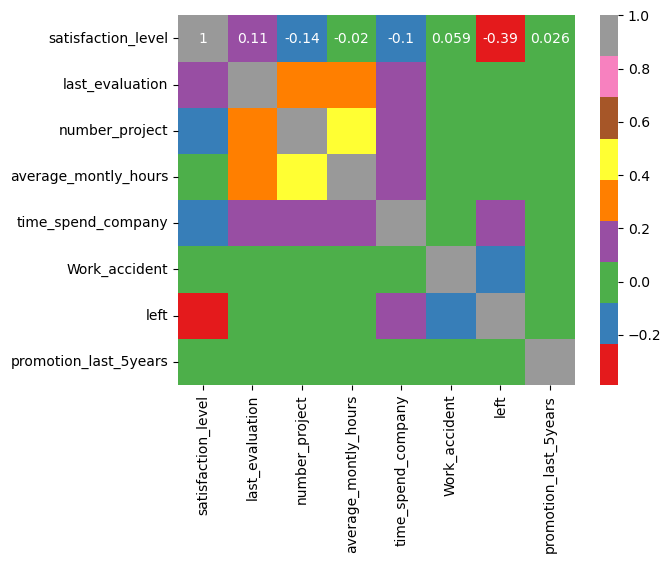

In [39]:
sns.heatmap(corr, annot = True, cmap = 'Set1')
plt.show()

In [40]:
corr.style.background_gradient(cmap = 'Set1')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# distribution plot

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
x= df_new.drop(columns = ["left"])
y = df_new["left"]

In [43]:
MM = MinMaxScaler()

In [45]:
MM.fit(x)    

MinMaxScaler()

In [47]:
MM.fit_transform(x)

array([[0.31868132, 0.265625  , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.5       , 0.        ,
        0.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.25      , 0.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.125     , 0.        ,
        0.        ]])

<Axes: ylabel='Density'>

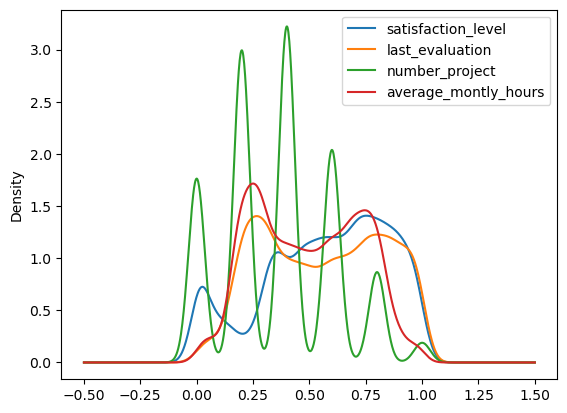

In [51]:
MM_transformed = MM.fit_transform(x)
x = pd.DataFrame(MM_transformed, columns = x.columns)

x.iloc[:,:4].plot.kde()


In [56]:
project = df_new['number_project']
left = df_new['left']

<BarContainer object of 14999 artists>

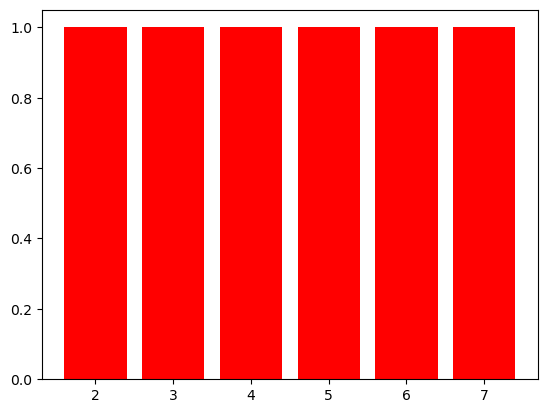

In [59]:
plt.bar(project,left,color = 'red')

In [10]:
# train - test split the data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.2, random_state = 123)

In [11]:
import statsmodels.api as sm

In [13]:
model = sm.OLS(ytrain, xtrain).fit()

In [14]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   left   R-squared (uncentered):                   0.359
Model:                            OLS   Adj. R-squared (uncentered):              0.359
Method:                 Least Squares   F-statistic:                              961.5
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                        0.00
Time:                        02:28:50   Log-Likelihood:                         -5754.1
No. Observations:               11999   AIC:                                  1.152e+04
Df Residuals:                   11992   BIC:                                  1.157e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model  import LinearRegression

In [16]:
lr = LinearRegression()
lr

LinearRegression()

In [17]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [28]:
y_train_predicted = lr.predict(xtrain)
y_test_predicted = lr.predict(xtest)

In [21]:
print(f"R squared: {r2_score(ytrain, y_train_predicted)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, y_train_predicted))}")
print(f"MAE: {mean_absolute_error(ytrain, y_train_predicted)}")


R squared: 0.19637393249857382
RMSE: 0.382048572816658
MAE: 0.3044383361064487


# SGD

In [33]:
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [34]:
y_pred_sgd = sgd.predict(xtest)
print('Stochastic Gradient Desent')
print('Accuracy score : ', accuracy_score(ytest, y_pred_sgd))
print('Classification report \n:' ,classification_report(ytest, y_pred_sgd))
print('Confusion matrix \n:' ,confusion_matrix(ytest, y_pred_sgd))

Stochastic Gradient Desent
Accuracy score :  0.7606666666666667
Classification report 
:               precision    recall  f1-score   support

           0       0.76      1.00      0.86      2291
           1       0.00      0.00      0.00       709

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000

Confusion matrix 
: [[2282    9]
 [ 709    0]]


# GBC

In [44]:
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(n_splits = 5, random_state = 123,shuffle = True)

In [47]:
for train_index, val_index in kfold.split(x):
    xtrain = x.iloc[train_index]
    xtest =  x.iloc[val_index]
    ytrain = y.iloc[train_index]
    ytest =  y.iloc[val_index]

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gdc = GradientBoostingClassifier(learning_rate = 0.1)

In [50]:
gdc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
gdc.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [52]:
pred_gdc = gdc.predict(xtest)

In [53]:
print(classification_report(ytest, pred_gdc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2294
           1       0.98      0.93      0.96       705

    accuracy                           0.98      2999
   macro avg       0.98      0.96      0.97      2999
weighted avg       0.98      0.98      0.98      2999



In [54]:
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(n_splits = 5, random_state = 123,shuffle = True)

In [57]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
y_pred_lr = lr.predict(xtest)
print("Logistic")

print("Accuracy score: ", accuracy_score(ytest, y_pred_lr))
print("classification Report:\n ", classification_report(ytest, y_pred_lr))
print("confusion matrix:\n ", confusion_matrix(ytest, y_pred_lr))


Logistic
Accuracy score:  0.7702567522507503
classification Report:
                precision    recall  f1-score   support

           0       0.80      0.92      0.86      2294
           1       0.52      0.27      0.35       705

    accuracy                           0.77      2999
   macro avg       0.66      0.60      0.61      2999
weighted avg       0.74      0.77      0.74      2999

confusion matrix:
  [[2121  173]
 [ 516  189]]


C:\Users\hp\Downloads\anc\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
